<h1>Japanese Restaurants</h1>
<h2>Linear Regression</h2>
<p>
   What do you have to do in this weekely assignment:
<ul>
    <li>Load reservation data (e.g. the one you have prepared last week) </li>
    <li>Load visit data (e.g. the one you have prepared last week) </li>
    <li>Make a selection on data sets for one restaurant, for one month, and plot the number of reservations against the number of visits</li>
    <ul>
        <li>air_id="air_96743eee94114261"</li>
        <li>month=1</li>
        <li>year=2016</li>
    </ul>
    <li>Fit a line through these points</li>
    <li>Calculate the expected number of visits when there are 11 reservations</li>
</ul>
</p>

In [2]:
import pandas as pd
import numpy as np
#path='../data/'
path = "C:/Users/kleis500/Eclipse workspace/kaggle/japan restaurant/data/"
reservation_data=pd.read_csv(path+'reservation_data.csv',sep=";")
reservation_data['visit_datetime'] = pd.to_datetime(reservation_data['visit_date'])
reservation_data.head()

,Unnamed: 0,air_store_id,visit_date,sum_visitors,avg_diff_reservation_visit_days,visit_datetime,weekday,weekday_name,year,month,day_of_week,holiday_flg
0,0,air_00a91d42b08b08d9,2016-01-14,2,3,2016-01-14,3,Thursday,2016,1,Thursday,0
1,1,air_00a91d42b08b08d9,2016-01-15,4,6,2016-01-15,4,Friday,2016,1,Friday,0
2,2,air_00a91d42b08b08d9,2016-01-16,2,3,2016-01-16,5,Saturday,2016,1,Saturday,0
3,3,air_00a91d42b08b08d9,2016-01-22,2,3,2016-01-22,4,Friday,2016,1,Friday,0
4,4,air_00a91d42b08b08d9,2016-01-29,5,6,2016-01-29,4,Friday,2016,1,Friday,0


In [3]:
visit_data=pd.read_csv(path+'air_visit_data.csv')
visit_data['visit_datetime']=pd.to_datetime(visit_data['visit_date'])
visit_data['weekday'] = visit_data['visit_datetime'].dt.weekday
visit_data['weekday_'] = visit_data['visit_datetime'].dt.weekday_name
visit_data['year'] = visit_data['visit_datetime'].dt.year
visit_data['month'] = visit_data['visit_datetime'].dt.month
visit_data.head()

,air_store_id,visit_date,visitors,visit_datetime,weekday,weekday_,year,month
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,2,Wednesday,2016,1
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,3,Thursday,2016,1
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,4,Friday,2016,1
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,5,Saturday,2016,1
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,0,Monday,2016,1


<h2>Select a particular restaurant, month and year</h2>
<p>Note that not all restaurants have data about visits.
    </p>

In [4]:

air_id="air_96743eee94114261"
month=1
year=2016
reservation_mask = (reservation_data['month']==month) & (reservation_data['year'] ==year) & (reservation_data['air_store_id']==air_id)
selected_reservation_data= reservation_data.loc[reservation_mask]
visit_mask = (visit_data['month']==month) & (visit_data['year'] ==year) & (visit_data['air_store_id']==air_id)
selected_visit_data=visit_data.loc[visit_mask]
print("count days reservations:",len(selected_reservation_data), "count days visits",len(selected_visit_data))
selected_data=pd.merge(selected_reservation_data, selected_visit_data, how='left', on=['visit_date']) 
selected_data=selected_data[['visit_date','sum_visitors','visitors']]
selected_data.columns = ['date', 'reservations','visitors']
print("after merge ", selected_data.shape)
selected_data

count days reservations: 20 count days visits 22
after merge  (20, 3)


,date,reservations,visitors
0,2016-01-06,3,12
1,2016-01-07,4,15
2,2016-01-08,7,7
3,2016-01-09,6,11
4,2016-01-10,8,14
5,2016-01-12,2,11
6,2016-01-13,18,24
7,2016-01-14,13,23
8,2016-01-15,8,15
9,2016-01-16,16,24


<h2>plot the number of reservations against the number of actual visits</h2>

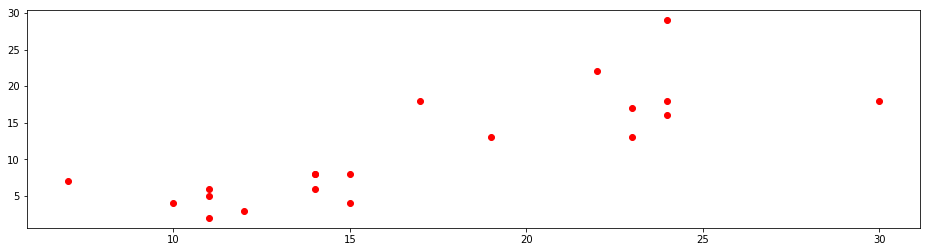

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16, 4)) 
plt.plot(selected_data['visitors'], selected_data['reservations'],'ro')


<h2>Fit a line through these points</h2>
<p>note that if you use SciKit, the X variable needs to be of a special (matrix) format</p> 

In [6]:
from sklearn.linear_model import LinearRegression
selected_data['visitors']
#print(selected_data['visitors'])
x=selected_data['reservations'].values
print(x)
X=np.vstack(x)
print(X)
y=selected_data['visitors'].values
print(y)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)


[ 3  4  7  6  8  2 18 13  8 16  4 22 13 29  5  6 18  8 18 17]
[[ 3]
 [ 4]
 [ 7]
 [ 6]
 [ 8]
 [ 2]
 [18]
 [13]
 [ 8]
 [16]
 [ 4]
 [22]
 [13]
 [29]
 [ 5]
 [ 6]
 [18]
 [ 8]
 [18]
 [17]]
[12 15  7 11 14 11 24 23 15 24 10 22 19 24 11 14 17 14 30 23]
9.258299006542286 [0.6881512]


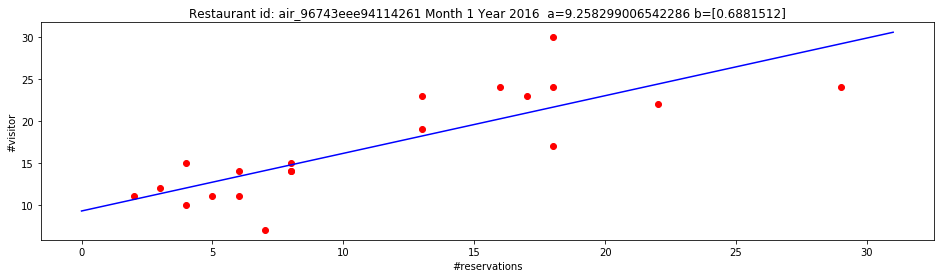

In [7]:
a=lin_reg.intercept_
b=lin_reg.coef_
fig = plt.figure(figsize=(16, 4)) 

plt.title("Restaurant id: "+str(air_id)+" Month "+str(month)+" Year "+str(year)+ "  a="+str(a)+" b="+str(b))
plt.xlabel('#reservations')
plt.ylabel('#visitor')

plt.plot( selected_data['reservations'], selected_data['visitors'],'ro')

new_x=[0,31]
new_y0=a+b*new_x[0]
new_y1=a+b*new_x[1]
new_y=[new_y0,new_y1]
plt.plot(new_x, new_y, "b-")


<h2>Calculate the expected number of visits when there are 11 reservations</h2>

In [8]:
print(a+b*12)

[17.5161134]
